In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import dufte
#plt.style.use('ggplot')
#plt.style.use('seaborn')
plt.style.use('fivethirtyeight')
#plt.style.use(dufte.style)

# **DP5 - Casos diarios**: Data product 5.

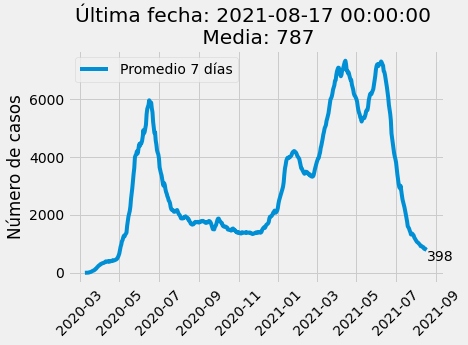

In [2]:
def daily_cases():
    """
    Función que genera plot de casos diarios. Se elimina fecha '2020-06-17'
    dado que presenta un número muy alto de casos. Datos son obtenidos del
    Data product 5. 
    """
    # Se crea data frame.
    path5 = 'D:\Proyectos\Datos-COVID19\output\producto5\TotalesNacionales.csv'
    df = pd.read_csv(path5).transpose()
    df = df.rename(columns={i: df.loc['Fecha', i] for i in range(19)})
    df = df.drop(index=['Fecha'])
    df.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df.index]

    # Se agrega columna de casos diarios.
    df['Casos diarios'] = df['Casos totales'].diff(periods=1)

    # Se elimina '2020-06-17'. 
    df = df.drop(index=[datetime.datetime(2020, 6, 17)])

    # Se agrega columna promedio 7 días para casos diarios.
    n = 7
    df['Casos diarios promedio {} días'.format(n)] = df['Casos diarios'].rolling(window=n).mean()

    # PLoteo de casos diarios.
    #plt.bar(df.index[7:], df['Casos diarios'][7:], color='lightblue')
    plt.plot(df.index[7:], df['Casos diarios promedio 7 días'][7:].values, label='Promedio 7 días')
    plt.xticks(rotation=45)
    plt.title('Última fecha: {} \n Media: {}'. format(df.index[-1], round(df['Casos diarios promedio 7 días'][-1])))
    plt.annotate('{}'.format(round(df['Casos diarios'][-1])), (df.index[-1], df['Casos diarios'][-1]))
    plt.ylabel('Número de casos')
    plt.legend()
    plt.show()

daily_cases()

# **Pacientes COVID-19 en UCI por grupo de edad**: Data product 9

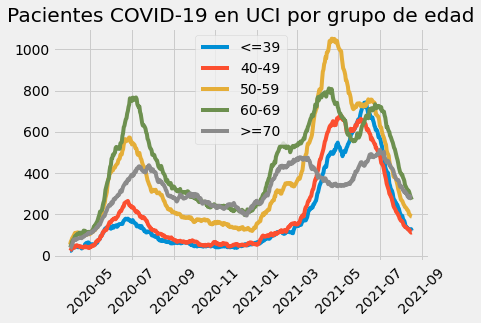

In [3]:
path9 = 'D:\Proyectos\Datos-COVID19\output\producto9\HospitalizadosUCIEtario_T.csv'
edad = pd.read_csv(path9)
edad.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in edad['Grupo de edad']]
edad.drop(columns=['Grupo de edad'], inplace=True)
#edad.tail(10)

for grupo in edad.columns:
    plt.plot(edad.index, edad[grupo], label=grupo)

plt.title('Pacientes COVID-19 en UCI por grupo de edad')
plt.legend()
plt.xticks(rotation=45)
plt.show()

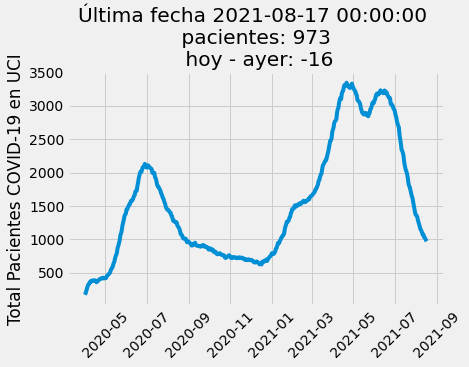

In [4]:
# El agregado (suma sobre los intervalos de edades)
agg = edad.sum(axis=1)
plt.plot(agg.index, agg)
plt.xticks(rotation=45)
plt.ylabel("Total Pacientes COVID-19 en UCI")
plt.title("Última fecha {} \n pacientes: {} \n hoy - ayer: {}".format(agg.index[-1], agg[-1], agg[-1] - agg[len(agg) - 2]))
plt.show()

# **DP10 - Fallecidos con COVID-19 por grupo de edad: Descripción**: Data product 10

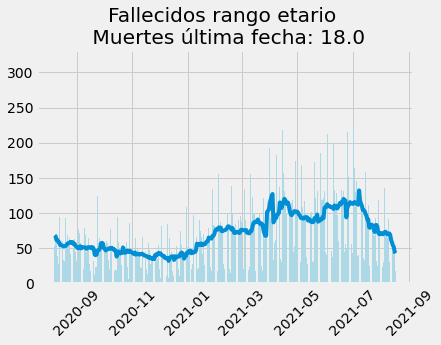

In [5]:
def daily_deaths():
    path10 = 'D:\Proyectos\Datos-COVID19\output\producto10\FallecidosEtario_T.csv'
    fallecidos_etario = pd.read_csv(path10)

    # Poner fechas como index.
    fallecidos_etario.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in fallecidos_etario['Grupo de edad']]
    fallecidos_etario.drop(columns=['Grupo de edad'], inplace=True)

    # "Derivar" para encontrar los casos diarios desde los acumulados.
    fallecidos_etario = fallecidos_etario.diff(periods=1)

    rangos =  ['<=39', '40-49', '50-59', '60-69', '70-79', '80-89', '>=90']
    #
    start_date = datetime.datetime(2020, 8, 1)
    #rangos = ['70-79', '80-89']

    #since_start_date = fallecidos_etario[rangos][fallecidos_etario.index >= start_date]
    #plt.bar(since_start_date.index[7:], since_start_date.sum(axis=1)[7:], color='lightblue')
    #plt.plot(since_start_date.index[7:], since_start_date.sum(axis=1).rolling(window=7).mean()[7:])

    fallecidos_etario = fallecidos_etario[rangos][fallecidos_etario.index >= start_date]    

    plt.bar(fallecidos_etario.index[7:], fallecidos_etario.sum(axis=1)[7:], color='lightblue')
    plt.plot(fallecidos_etario.index[7:], fallecidos_etario.sum(axis=1).rolling(window=7).mean()[7:])
    plt.title('Fallecidos rango etario \n Muertes última fecha: {}'.format(fallecidos_etario.sum(axis=1)[-1]))
    plt.xticks(rotation=45)
    plt.show()

daily_deaths()


# **DP17 - PCR data**: Data product 17

In [22]:
path17 = 'D:\Proyectos\Datos-COVID19\output\producto17\PCREstablecimiento_T.csv'
df = pd.read_csv(path17)
print(df.columns) 
#df['new'] = df['Instituto de salud pública'].diff(periods=1)
df.head(50)


Index(['Establecimiento', 'Instituto de salud pública', 'Hospitales público',
       'Privados', 'Instituto de salud pública.1', 'Hospitales público.1',
       'Privados.1', 'Total realizados', 'Total informados ultimo dia'],
      dtype='object')


,Establecimiento,Instituto de salud pública,Hospitales público,Privados,Instituto de salud pública.1,Hospitales público.1,Privados.1,Total realizados,Total informados ultimo dia
0,Examenes,realizados,realizados,realizados,informados ultimo dia,informados ultimo dia,informados ultimo dia,realizados,informados ultimo dia
1,2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3290.0
2,2020-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4886.0
3,2020-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7387.0
4,2020-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3534.0
5,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1777.0
6,2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3680.0
7,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3046.0
8,2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2898.0
9,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2685.0


# **DP49 - Positividad Diaria**: Data product 49

In [16]:
path49 = 'D:\Proyectos\Datos-COVID19\output\producto49\Positividad_Diaria_Media_T.csv'
df = pd.read_csv(path49)
df['pcr + ag'] = df['casos pcr'] + df['casos ag']
df['prom 7 dias'] = round((df['casos pcr'] / df['pcr']).rolling(window=7).mean(), 4)
df.tail(5)

,Fecha,pcr,casos pcr,casos ag,positividad pcr,mediamovil_positividad_pcr,pcr + ag,prom 7 dias
489,2021-07-27,28945.0,629.0,124.0,0.0217,0.0239,753.0,0.0239
490,2021-07-28,28055.0,610.0,218.0,0.0217,0.0231,828.0,0.0231
491,2021-07-29,61854.0,1219.0,164.0,0.0197,0.0221,1383.0,0.0221
492,2021-07-30,57330.0,1228.0,127.0,0.0214,0.0213,1355.0,0.0213
493,2021-07-31,54852.0,986.0,166.0,0.0180,0.0208,1152.0,0.0208


In [11]:
# A agregar: vacunación y positividad.